In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("GSPC.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...,...,...
17213,2018-05-31,2720.979980,2722.500000,2700.679932,2705.270020,2705.270020,4235370000
17214,2018-06-01,2718.699951,2736.929932,2718.699951,2734.620117,2734.620117,3684130000
17215,2018-06-04,2741.669922,2749.159912,2740.540039,2746.870117,2746.870117,3376510000
17216,2018-06-05,2748.459961,2752.610107,2739.510010,2748.800049,2748.800049,3517790000


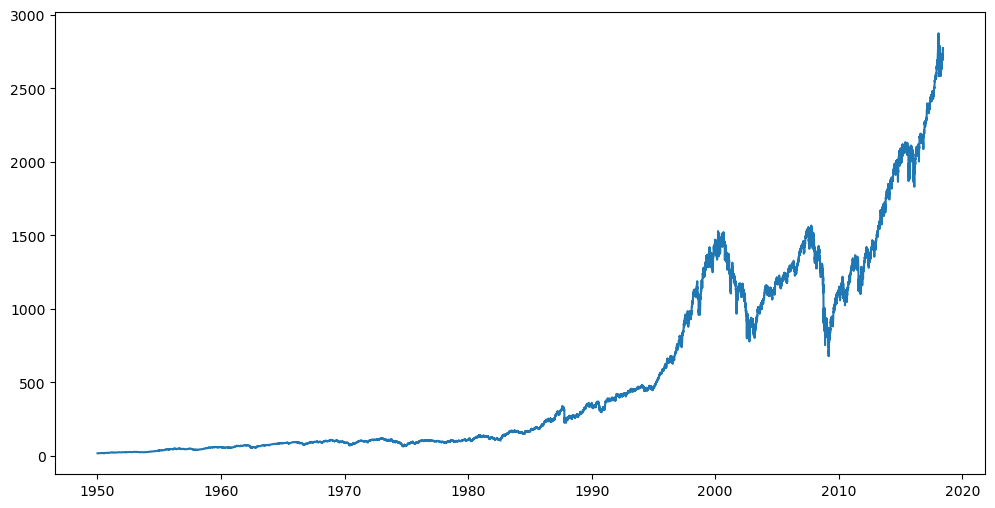

In [34]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(data['Date'], data['Close'])
plt.show()

In [17]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date_num'] = (data['Date'] - data['Date'].min()).dt.days
X = data[['Date_num']]  
y = data['Close'] 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression(fit_intercept=True)

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.score(X_test, y_test)

0.7453058305764679

In [33]:
coef_angolare = model.coef_[0]
intercetta = model.intercept_

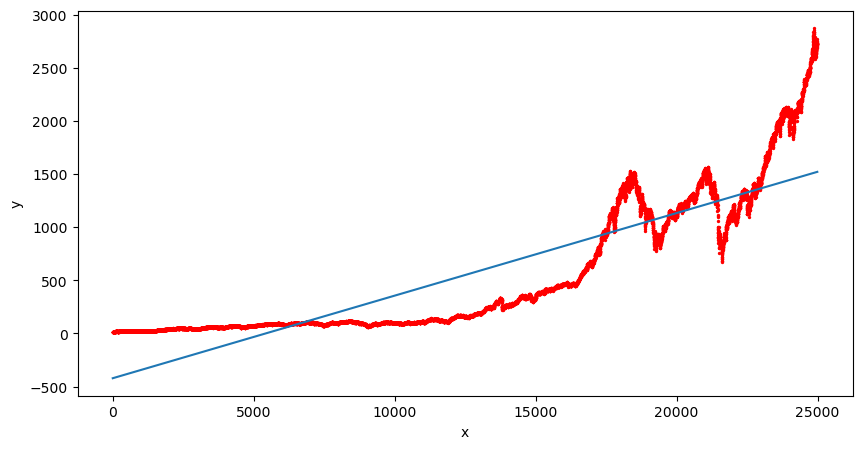

In [26]:
ascissa = np.linspace(X.min(),X.max(),100)
ordinata = coef_angolare*ascissa + intercetta 
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(X,y, s = 2, c ="r")
ax.plot(ascissa, ordinata)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [37]:
X = data[['Date_num']]  
y_2 = np.log(data['Close']) 

In [38]:
X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size=0.2, random_state=42)

In [39]:
model_2 = LinearRegression(fit_intercept=True)

In [40]:
model_2.fit(X_train, y_2_train)

LinearRegression()

In [41]:
model_2.score(X_test, y_2_test)

0.9591909080734242

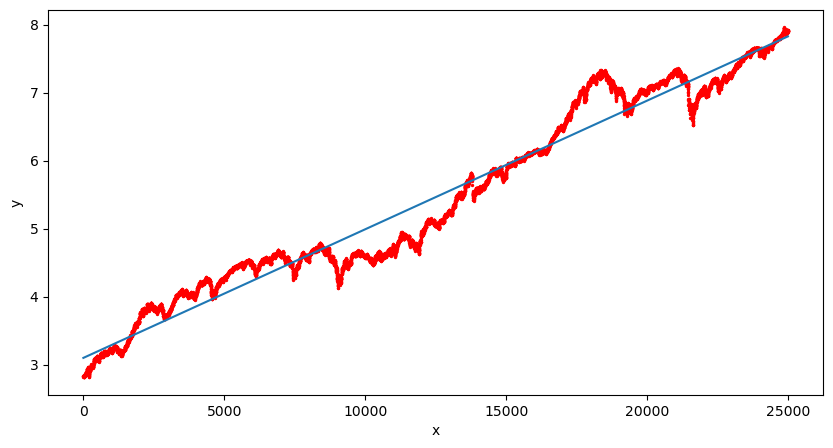

In [45]:
coef_angolare = model_2.coef_[0]
intercetta = model_2.intercept_
ascissa = np.linspace(X.min(),X.max(),100)
ordinata = coef_angolare*ascissa + intercetta 
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(X,y, s = 2, c ="r")
ax.plot(ascissa, ordinata)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

Si usano i log per essere più precisi perchè riducono la fluttuazione dei prezzi che hanno cambiamenti esponenziali